# 3장 EDA와 시각화

## 1절 EDA의미

EDA는 데이터분석의 첫 번째 단계로, 데이터의 특징과 내제된 관계를 알아내기 위해 그래프와 통계적 분석 방법을 활용하여 데이터를 탐구하는 
것이다. 저항성의 강조, 잔차 계산, 자료변수의 재표현, 그래프를 통한 현시성이라는 4가지 주제로 구분된다.

In [4]:
# 사용 패키지 import 및 데이터 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0',1:'class_1',2:'class_2'})

# 도수분포표
wine_type = wine['Class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

In [5]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


## 2절 막대그래와 히스토그램

### 1.막대그래프

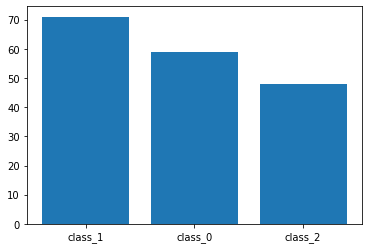

In [8]:
# 막대그래프 그리기
# plt.bar(x, height, width, bottom=None,align='center',data=None)
# x : 막대의 x 좌표= 범주형 변수의 이름
# bottom: 막대 바닥면의 y좌표(누적 막대그래프를 그릴 때 사용할 수 있음)
# align: x 좌표에 대한 막대 정렬 center or edge
plt.bar(wine_type.index, wine_type.values, align='center',width=0.8)
plt.show()

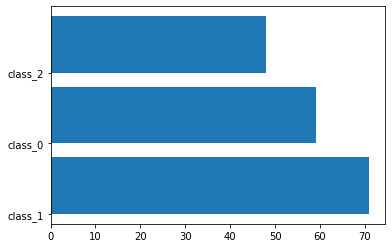

In [10]:
# 수평막대그래프 그리기
plt.barh(wine_type.index, wine_type.values, height=0.8,left=None, align = 'edge')
plt.show()

### 2. 히스토그램

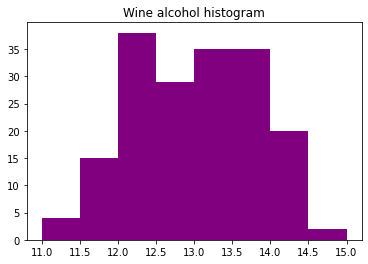

In [11]:
# plt.hist("변수명", bins=None, range=None, density=False, data =df)
# bins: 히스토그램의 구간의 개수 정의
# range: bin의 상한값과 하한값 (x.min(),x.max()) 형태로 선언
# density: True이면 확률밀도함수를 반환

plt.title("Wine alcohol histogram")
plt.hist('alcohol', bins=8, color='purple',data=wine, range=(11,15))
plt.show()

### 3. 상자그림(Box Plot)

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour',2:'Virginica'})

In [14]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


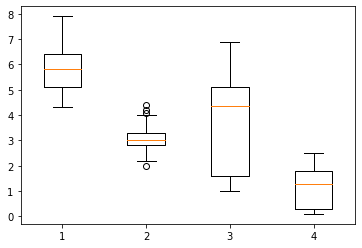

In [16]:
plt.boxplot(iris.drop(columns='class'))
plt.show()

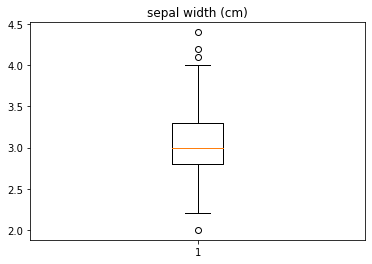

In [20]:
plt.boxplot(iris['sepal width (cm)'], whis=1.5)
plt.title('sepal width (cm)')
plt.show()

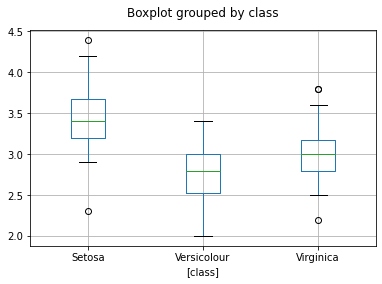

In [24]:
iris[['sepal width (cm)','class']].boxplot(by='class')
plt.title('')
plt.show()

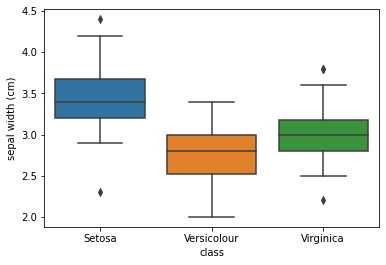

In [25]:
import seaborn as sns
sns.boxplot(x='class',y='sepal width (cm)',data= iris)
plt.show()

### 4. 산점도

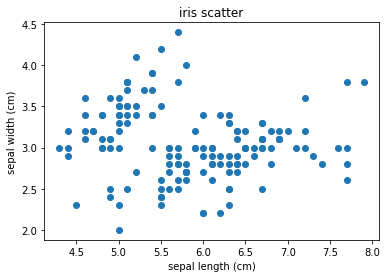

In [28]:
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(x=iris['sepal length (cm)'],y =iris['sepal width (cm)'])
plt.show()

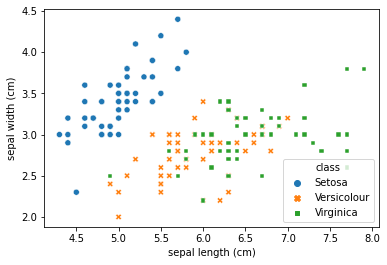

In [30]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',data=iris, hue='class',style='class') #hue는 클래스 별로 색깔 style은 점 모양 
plt.show()

### 5. 선 그래프

In [32]:
import numpy as np

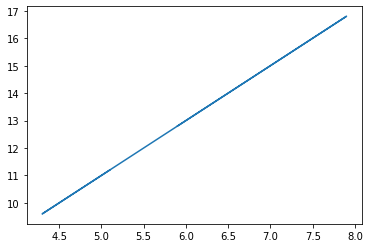

In [31]:
def linear_func(x):
    return 2*x+1

X = iris['sepal length (cm)']
plt.plot(X, linear_func(X))
plt.show()

In [35]:
X,Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1,b0 = np.polyfit(X,Y,1)

In [36]:
b1

1.8584329782548397

In [37]:
b0

-7.101443369602449

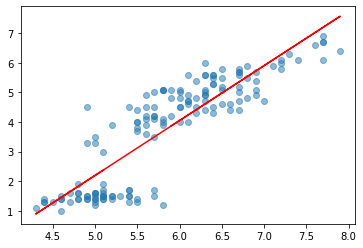

In [38]:
plt.scatter(X,Y,alpha=0.5)
plt.plot(X, b1*X + b0, color ='red')
plt.show()

### 6. 상관관계 시각화

In [41]:
from pandas.plotting import scatter_matrix

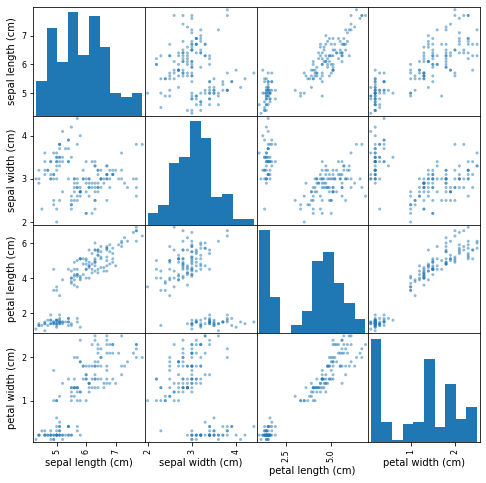

In [42]:
scatter_matrix(iris, alpha=0.5, figsize=(8,8),diagonal='hist')
plt.show()

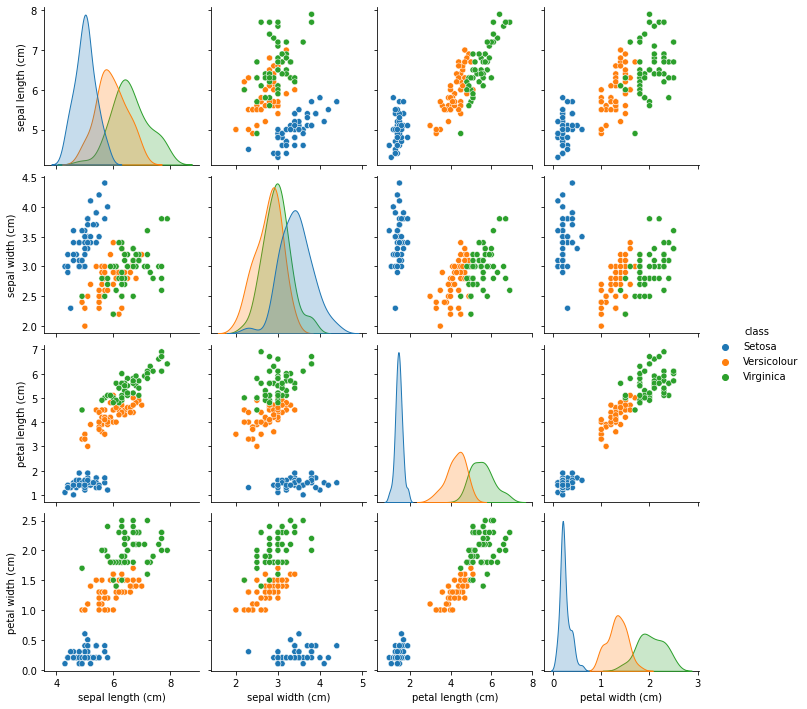

In [46]:
sns.pairplot(iris, diag_kind='auto',hue='class')
plt.show()

In [47]:
#sns.heatmap(data, xticklabels = data.cloumns, yticklabels=data.columns, cmap= '색깔', annot=True)
#annot: True일 경우 상관계수를 텍스트로 표시

In [48]:
iris_corr = iris.drop(columns='class').corr(method='pearson')


In [50]:
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


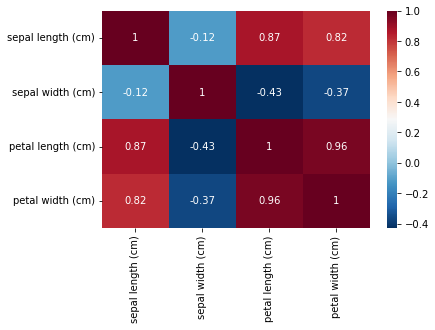

In [53]:
sns.heatmap(iris_corr, xticklabels= iris_corr.columns,yticklabels = iris_corr.columns,cmap='RdBu_r', annot=True)
plt.show()

In [54]:
!pip install pandas-profiling[notebook,html]

  Using cached htmlmin-0.1.12.tar.gz (19 kB)


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=2ae33218e38a565c1d005fa62d7616558caac85b91f1f5ec6d47fbe84e055810
  Stored in directory: c:\users\82107\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
